##This dataset is about the information regarding laptops.

##It is an unlabelled dataset and hence we are going to implement clustering algorithm here

##K-Means Clustering is the algorithm that will be used for this dataset.


#1. Start by importing all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn.metrics import silhouette_score

#2. Import dataset

In [2]:
data = pd.read_csv(r'D:\DataScience\Data\ML Data\zomato.csv')
df=pd.DataFrame(data)
print(df.to_string())

           Date        Open        High         Low       Close   Adj Close     Volume
0     7/23/2021  116.000000  138.899994  115.000000  126.000000  126.000000  694895290
1     7/26/2021  126.349998  143.750000  125.300003  140.649994  140.649994  249723854
2     7/27/2021  141.699997  147.800003  127.750000  132.899994  132.899994  240341900
3     7/28/2021  131.000000  135.000000  123.550003  131.199997  131.199997  159793731
4     7/29/2021  134.949997  144.000000  132.199997  141.550003  141.550003  117973089
5     7/30/2021  142.600006  142.699997  131.000000  133.500000  133.500000   88312522
6      8/2/2021  135.750000  140.750000  135.149994  139.699997  139.699997   66909732
7      8/3/2021  137.000000  140.800003  137.000000  139.399994  139.399994   46610001
8      8/4/2021  139.800003  141.000000  135.250000  138.399994  138.399994   41134419
9      8/5/2021  138.750000  138.899994  132.000000  134.949997  134.949997   38437134
10     8/6/2021  135.500000  136.199997  13

#3. Select features for x

In [3]:
x = df.iloc[:, 1:].values

#4. Finding optimal number of clusters using the elbow method

In [4]:
from sklearn.cluster import KMeans
wcss_list= []

#Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.

c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[3.50701932513493e+18, 1.285173385711945e+18, 6.834853348017587e+17, 3.6516228074741574e+17, 2.6315762117184934e+17, 1.6857149557133645e+17, 1.2047073856212118e+17, 8.360612646847286e+16, 6.731884694543707e+16, 5.355684540948069e+16]


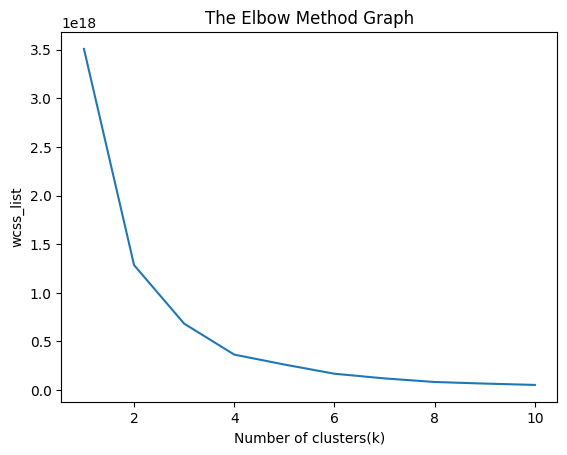

In [5]:
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
   kmeans.fit(x)
   wcss_list.append(kmeans.inertia_)
print(wcss_list)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

#From the Elbow Method, we observed a sharp bent at the value 3, Hence we take K as 3.

#5. Training the K-means model on a dataset

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)
print(y_predict)


[2 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 2 2 2
 1 1 1 1 2 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#To assess the clustering performance, we use a metric known as Silhouette Score

#6. Finding Silhouette score

In [7]:
print(silhouette_score(x, kmeans.fit_predict(x)))

c:\Users\jibyw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7144523452692932


# Conclusion

#We have observed that the silhouette score of this model is 0.7 which is considered to be strong and hence our clustering result is well defined.